In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from prophet import Prophet
import warnings
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX

import math
from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential 
from keras.layers import Dense, LSTM

pd.set_option('display.float_format', '{:.3f}'.format)

In [2]:
data=pd.read_excel('W_store_2.xlsx')

In [3]:
data

,Date,Store Name,Usage Potable Water,Usage Natural Gas,Usage Electric,Usage ILA Water,Usage Fuel Oil Distillate,Usage Propane/LPG/Butane,Usage Photovoltaic,Usage Sewer,cost Potable Water,cost Natural Gas,cost Electric,cost ILA Water,cost Fuel Oil Distillate,cost Propane/LPG/Butane,cost Photovoltaic,cost Sewer,Total cost
0,2016-06-01,Store A,5562.380,10485.472,8084908.300,0.000,0.000,0.000,3474.000,109.000,46826.622,75101.100,712206.367,0,0.000,0.000,325.861,33119.060,867579.009
1,2016-07-01,Store A,5783.110,8821.860,8687468.750,0.000,0.000,3444.000,2679.000,111.000,48685.670,79024.174,757021.989,0,0.000,5730.900,0.000,33583.630,924046.363
2,2016-08-01,Store A,6667.420,8438.090,10276710.700,0.000,0.000,0.000,2822.000,111.000,56129.384,73879.861,881171.635,0,0.000,0.000,0.000,33583.630,1044764.511
3,2016-09-01,Store A,6806.010,9330.300,9093841.750,0.000,0.000,10.000,2897.000,111.000,57293.307,77882.006,785914.709,0,0.000,25.470,0.000,33583.630,954699.121
4,2016-10-01,Store A,4682.380,13570.000,7476255.190,0.000,0.000,0.000,1622.000,111.000,39417.618,111403.153,647857.328,0,0.000,0.000,0.000,33583.630,832261.729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2020-03-01,Store D,9944.060,51801.898,7584860.629,59.940,983.920,47.940,3854.010,5605.690,78818.065,209737.375,607701.624,0,2482.697,121.839,0.000,62223.168,958602.070
196,2020-04-01,Store D,8018.270,37736.330,7552630.347,199.680,7867.145,41.907,5828.260,5605.690,63537.576,153166.525,606572.870,0,18505.040,63.036,0.000,62223.168,885500.138
197,2020-05-01,Store D,14022.520,37402.786,8715423.921,497.850,0.000,68.010,6629.410,5605.690,111115.854,190647.892,702225.785,0,0.000,101.018,0.000,62223.168,1066313.716
198,2020-06-01,Store D,8112.020,26077.922,10478834.896,2315.250,0.000,56.410,7642.410,5605.690,64296.163,137365.284,836363.123,0,0.000,85.892,327.312,62223.168,1100333.630


In [4]:
# selecting store name and columns..
train=data.loc[data['Store Name']=='Store D','Usage Propane/LPG/Butane'].reset_index(drop=True)
year=2
tp=list(range(train.index[-1]+1+(year*12)))

In [5]:
# Test train split 
Train=train[0:36]
Test=train[36:]

order = (0, 0, 0) RMSE= 1109.2564083032344
order = (0, 0, 1) RMSE= 1102.7857890276925
order = (0, 0, 2) RMSE= 1099.3580330679981
order = (0, 1, 0) RMSE= 1174.0685091237224
order = (0, 1, 1) RMSE= 1191.1116348315443
order = (0, 1, 2) RMSE= 1185.8617166606057
order = (0, 2, 0) RMSE= 1221.15945076248
order = (0, 2, 1) RMSE= 1178.8771328712314
order = (0, 2, 2) RMSE= 1185.0340053006976
order = (1, 0, 0) RMSE= 1101.258518526911
order = (1, 1, 0) RMSE= 1187.5105299234933
order = (1, 1, 1) RMSE= 1179.0142718444501
order = (1, 1, 2) RMSE= 1196.1552427165282
order = (1, 2, 0) RMSE= 1184.2220166379618
order = (1, 2, 1) RMSE= 1177.4253567230555
order = (1, 2, 2) RMSE= 1187.3845930841924
order = (2, 0, 0) RMSE= 1100.9367188097156
order = (2, 0, 1) RMSE= 1100.6841337641986
order = (2, 0, 2) RMSE= 989.2425209404048
order = (2, 1, 0) RMSE= 1187.580128523489
order = (2, 1, 1) RMSE= 1169.6645193525424
order = (2, 1, 2) RMSE= 1170.0188059686284
order = (2, 2, 0) RMSE= 1175.583646018792
order = (2, 2, 1)

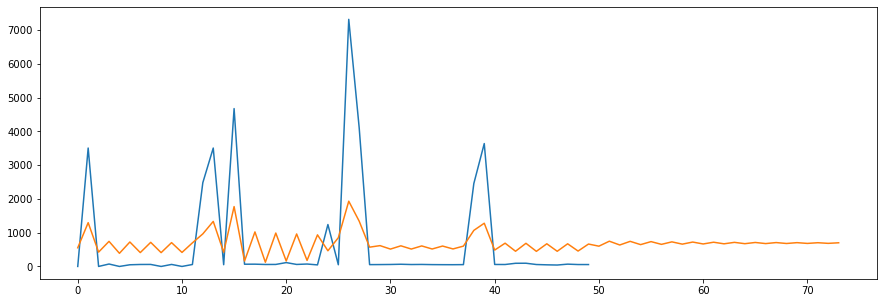

In [6]:
#building arima model on train data and checking performance on test
# saving the parameters that perform best on the test data 
m=float('inf')
# searching the best parameters for ARIMA model.
x=3
y=3
z=3
warnings.filterwarnings("ignore")
for i in range(0,x,1):
    for j in range(0,y,1):
        for k in range(0,z,1):
            try:
                model=ARIMA(Train,order=(i,j,k))
                model=model.fit()
                RM=model.predict(start = Test.index[0],end = Test.index[-1])
                RMSE=np.sqrt(mean_squared_error(Test,RM))
                order=(i,j,k)
                print("order =",order,"RMSE=",RMSE)
                if RMSE<m :
                    m=RMSE
                    best_order1=(i,j,k)
            except:
                continue

                
# best arima model parameter
m,best_order1


# finding which parameter works on overall data 
m=float('inf')
for k in range(0,z,1):
    try:
        model=ARIMA(train,order=(best_order1[0],best_order1[1],k))
        model=model.fit()
        RM=model.predict(start = train.index[0],end = train.index[-1])
        RMSE=np.sqrt(mean_squared_error(train,RM))
        order=(best_order1[0],best_order1[1],k)
        print("order =",order,"RMSE=",RMSE)
        if RMSE<m :
            m=RMSE
            best_order=order
    except:
        continue
        
# best arima model parameter on test data
m,best_order

# Building model on best parameter(ARIMA)
plt.figure(figsize=(15,5))
model=ARIMA(train,order=best_order)
model=model.fit()
predictions1=model.predict(start = tp[0]+1,end = tp[-1]+1)
plt.plot(train.index,train)
plt.plot(tp,predictions1)
#ax = plt.subplot(111)
#ax.set_yscale('log')

order = (0, 0, 0, 3) RMSE= 1174.6897927781374
order = (0, 0, 0, 6) RMSE= 1174.6897927781374
order = (0, 0, 0, 9) RMSE= 1174.6897927781374
order = (0, 0, 0, 12) RMSE= 1174.6897927781374
order = (0, 0, 1, 3) RMSE= 1173.8407035537657
order = (0, 0, 1, 6) RMSE= 1174.6933487523513
order = (0, 0, 1, 9) RMSE= 1173.4977236941093
order = (0, 0, 1, 12) RMSE= 767.7367519660745
order = (0, 0, 2, 3) RMSE= 1171.6395518666202
order = (0, 0, 2, 6) RMSE= 752.0663762414198
order = (0, 0, 2, 9) RMSE= 1174.0860164208486
order = (0, 0, 2, 12) RMSE= 930.9061913620808
order = (0, 1, 0, 3) RMSE= 1155.079572911383
order = (0, 1, 0, 6) RMSE= 1152.8771581796477
order = (0, 1, 0, 9) RMSE= 10324.857177735359
order = (0, 1, 0, 12) RMSE= 1382.9637424812904
order = (0, 1, 1, 3) RMSE= 1163.6309499565643
order = (0, 1, 1, 6) RMSE= 1128.587762661346
order = (0, 1, 1, 9) RMSE= 1341.4368556509978
order = (0, 1, 1, 12) RMSE= 1341.6929116428416
order = (0, 1, 2, 3) RMSE= 1155.5173621646886
order = (0, 1, 2, 6) RMSE= 1218.12

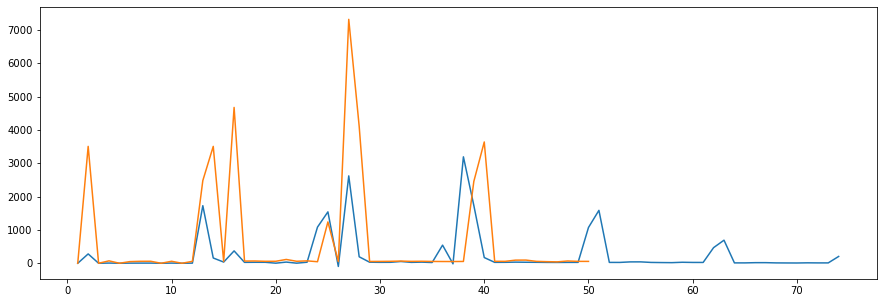

In [7]:
#SARIMA Model
se=[3,6,9,12]
m=float('inf')
x=3
y=3
z=3
for i in range(0,x,1):
    for j in range(0,y,1):
        for k in range(0,z,1):
            for u in range(len(se)):
                try:
                    my_seasonal_order = (i,j,k,se[u])
                    best_order=(i,j,k)
                    # define model
                    model = SARIMAX(Train, order=best_order, seasonal_order=my_seasonal_order).fit()
                    predictions=model.predict(start = Test.index[0],end = Test.index[-1])
                    RMSE=np.sqrt(mean_squared_error(Test,predictions))
                    ord=(i,j,k,se[u])
                    print("order =",ord,"RMSE=",RMSE)
                    if RMSE<m :
                        best_order1=(i,j,k)
                        m=RMSE
                        best_ord=ord
                except:
                    continue
                    
# The best performance of the Sarime model on test data 
best_ord,m  

#Building the model on Best parameters 
plt.figure(figsize=(15,5))
model = SARIMAX(train, order=best_order1, seasonal_order=best_ord).fit()
predictions2=model.predict(start = tp[0]+1,end = tp[-1]+1)
#RMSE=np.sqrt(mean_squared_error(train,predictions[1:50]))
plt.plot(predictions2.index,predictions2)
plt.plot(train.index+1,train)
print(RMSE)

In [8]:
#..............Neural Net Forecasting(LSTM)..........
dataset=np.array(pd.DataFrame(train))
dataset.shape
scaler= MinMaxScaler(feature_range=(0,1))
train_data=scaler.fit_transform(dataset)

X_train=[]
Y_train=[]

for i in range(12, len(train_data)-12):
    X_train.append(train_data[i-12:i,0])
    Y_train.append(train_data[i:i+12,0])

X_train, Y_train=np.array(X_train),np.array(Y_train)
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(12))
model.compile(optimizer='adam',loss='mean_squared_error')

model.fit(X_train,Y_train,batch_size=1,epochs=55)


test_data1= np.array(train_data[train_data.shape[0]-12:train_data.shape[0],:])
X_test=np.reshape(test_data1,(1,test_data1.shape[0],1))
predictions3=model.predict(X_test)
predictions3=scaler.inverse_transform(predictions3)
predictions3=pd.DataFrame(dataset).append(pd.DataFrame(np.transpose(predictions3))).reset_index(drop=True)[0]

Epoch 1/55
26/26 [==============================] - 0s 5ms/step - loss: 0.0659
Epoch 2/55
26/26 [==============================] - 0s 4ms/step - loss: 0.0606
Epoch 3/55
26/26 [==============================] - 0s 4ms/step - loss: 0.0584
Epoch 4/55
26/26 [==============================] - 0s 4ms/step - loss: 0.0557
Epoch 5/55
26/26 [==============================] - 0s 5ms/step - loss: 0.0527
Epoch 6/55
26/26 [==============================] - 0s 5ms/step - loss: 0.0496
Epoch 7/55
26/26 [==============================] - 0s 4ms/step - loss: 0.0460
Epoch 8/55
26/26 [==============================] - 0s 4ms/step - loss: 0.0454
Epoch 9/55
26/26 [==============================] - 0s 5ms/step - loss: 0.0457
Epoch 10/55
26/26 [==============================] - 0s 4ms/step - loss: 0.0442
Epoch 11/55
26/26 [==============================] - 0s 5ms/step - loss: 0.0434
Epoch 12/55
26/26 [==============================] - 0s 4ms/step - loss: 0.0432
Epoch 13/55
26/26 [==============================

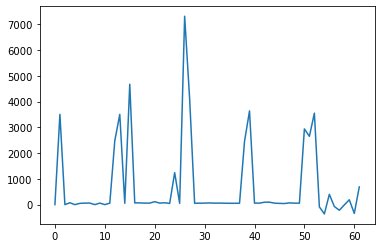

In [9]:
k=range(50,62)
plt.plot(predictions3.index,predictions3)
#plt.plot(predictions2.index-1,predictions2)

In [10]:
#finding best Holts winter model
Am=['add','mul']
#se=list(range(24))
se=list([6,12])
# fine tunning the Holt's winter model
p=float('inf')
for i in range(len(Am)):
    for j in range(len(Am)):
        for k in range(len(se)):
            try:
                hwe_model_mul= ExponentialSmoothing(Train,seasonal=Am[i],trend=Am[j],seasonal_periods=se[k]).fit()
                pred_hwe_mul = hwe_model_mul.predict(start = Test.index[0]+1,end = Test.index[-1]+1)
                RMSE_hwe_mul=np.sqrt(mean_squared_error(Test,pred_hwe_mul))
                print("seasonal=",Am[i],",trend=",Am[j],",seasonal period=",se[k],",RMSE=",RMSE_hwe_mul)
                if RMSE_hwe_mul<p:
                    p=RMSE_hwe_mul
                    q_1=Am[i]
                    q_2=Am[j]
                    q_3=se[k]
                
            except:
                continue
                

seasonal= add ,trend= add ,seasonal period= 6 ,RMSE= 1556.136623902896
seasonal= add ,trend= add ,seasonal period= 12 ,RMSE= 2735.706485732578


In [11]:
# Best Holt's winter parameter
q_1,q_2,q_3,p

('add', 'add', 6, 1556.136623902896)

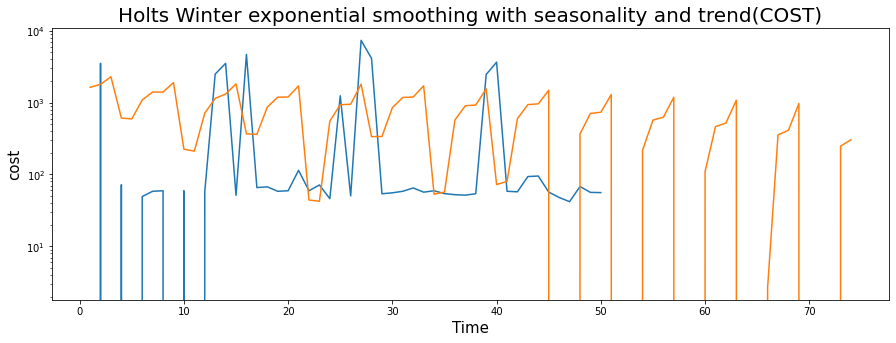

In [12]:
#building Holt's winter model using best parameter
hwe_model_mul= ExponentialSmoothing(train,seasonal=q_1,trend=q_2,seasonal_periods=q_3).fit() 
predictions4 = hwe_model_mul.predict(start = tp[0]+1,end = tp[-1]+1)
#print("RMSE_Holt_Winter_Multiplicative_Method",RMSE_hwe_mul)
plt.figure(figsize=(15,5))
plt.plot(train.index+1,train)
plt.plot(predictions4.index,predictions4)
plt.title('Holts Winter exponential smoothing with seasonality and trend(COST)', size =20)
plt.xlabel('Time',size=15)
plt.ylabel('cost',size=15)
ax = plt.subplot(111)
ax.set_yscale('log')
#ax.set_yticks([train.max()])
plt.show()

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


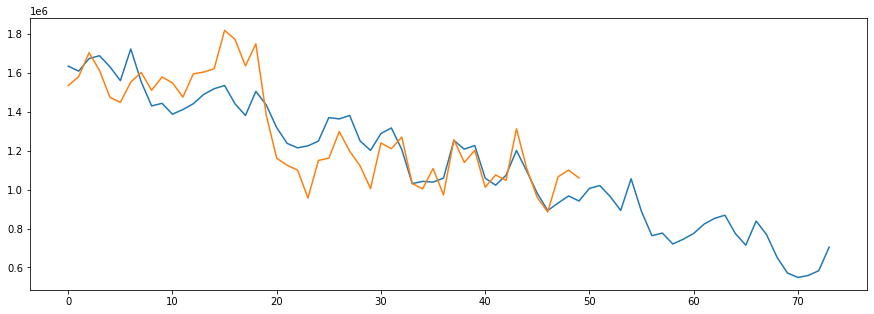

In [13]:
#Prophet library 
train=data.loc[data['Store Name']=='Store D','Total cost'].reset_index(drop=True)
train_date=data.loc[data['Store Name']=='Store D','Date'].reset_index(drop=True)

A=pd.DataFrame(train.values,train_date).reset_index()
A.columns=['ds','y']

m=Prophet()
m.fit(A)

ui1=pd.date_range(data['Date'][0], periods=74, freq='M').tolist()
ui1=pd.DataFrame(ui1,columns=['ds'])
ui1.ds=ui1.ds.map(lambda x: pd.datetime(x.year, x.month, 1))

forecast=m.predict(ui1)

plt.figure(figsize=(15,5))
plt.plot(forecast.yhat)
plt.plot(A.y)

In [14]:
########### If you want to save output of one model ###############

In [15]:
ap1=data.columns[2:]
ap2=data['Store Name'].unique()

In [16]:
############### Enter the columns that you want to forecast(you can enter multiple columns at same time) ##############
#Example : ap1=['Total cost','cost Electric']
ap1=['Total cost','cost Electric']

In [17]:
ak1=['Date','Store Number']
for i in range(len(ap1)):
    ak1.append(ap1[i])

In [18]:
# SAVING ARIMA FORECASTING DATA
ap4=pd.DataFrame([])
for au1 in range(len(ap2)):
    ap5=[]
    ap6=[]
    ap12=[]
    print(ap2[au1])
    for au2 in range(len(ap1)):
        train=data.loc[data['Store Name']==ap2[au1],ap1[au2]].reset_index(drop=True)
        #train=data_s['cost Electric'].reset_index(drop=True)
        year=2
        tp=list(range(train.index[-1]+1+(year*12)))
                
        Train=train[0:36]
        Test=train[36:]
        

        # searching the best parameters for ARIMA model.
        #############################  ARIMA  ###############################
        m=float('inf')
        # searching the best parameters for ARIMA model.
        x=3
        y=3
        z=3
        warnings.filterwarnings("ignore")
        for i in range(0,x,1):
            for j in range(0,y,1):
                for k in range(0,z,1):
                    try:
                        model=ARIMA(Train,order=(i,j,k))
                        model=model.fit()
                        RM=model.predict(start = Test.index[0],end = Test.index[-1])
                        RMSE=np.sqrt(mean_squared_error(Test,RM))
                        order=(i,j,k)
                        print("order =",order,"RMSE=",RMSE)
                        if RMSE<m :
                            m=RMSE
                            best_order1=(i,j,k)
                    except:
                        continue
        # finding which parameter works on overall data 
        m=float('inf')
        for k in range(0,z,1):
            try:
                model=ARIMA(train,order=(best_order1[0],best_order1[1],k))
                model=model.fit()
                RM=model.predict(start = train.index[0],end = train.index[-1])
                RMSE=np.sqrt(mean_squared_error(train,RM))
                order=(best_order1[0],best_order1[1],k)
                print("order =",order,"RMSE=",RMSE)
                if RMSE<m :
                    m=RMSE
                    best_order=order
            except:
                continue
        # Building model on best parameter(ARIMA)
        try:
            model=ARIMA(train,order=best_order)
            model=model.fit()
            prediction1=model.predict(start = tp[0]+1,end = tp[-1]+1)
        except:
            prediction1=[]
            for i in range(len(tp)):
                prediction1.append(0)
        
        ####################################################################
        if au2==0: 
            for i in range(tp[-1]+1):
                ap6.append(ap2[au1])
            
            ui=pd.date_range(data['Date'][0], periods=tp[-1]+1, freq='M').tolist()
            
            ap5.append(ui)
            ap5.append(ap6)
            

        ap5.append(prediction1)
    ap4=pd.concat([ap4,np.transpose(pd.DataFrame(ap5))],axis=0)
ap4.columns=ak1

ap4.Date=ap4['Date'].map(lambda x: pd.datetime(x.year, x.month, 1))
jp=ap4[ap4[ap1]<5].any().reset_index(drop=True)
jp=ap4.columns[jp]
for i  in range(len(jp)):
    ap4.loc[ap4[jp[i]]<0,jp[i]]=0
    
ap4=ap4.reset_index(drop=True)
#creating confidence intervals    
for ki in range(len(ap1)):
    L=[]
    U=[]
    for i in range(1, ap4.shape[0] + 1):
        A = ap4[ap1[ki]][0:i].reset_index(drop=True)
        B=ap4[ap1[ki]].reset_index(drop=True)
        A_l= B[i-1]-1.96*np.std(A)/np.sqrt(len(A))
        A_U= B[i-1]+1.96*np.std(A)/np.sqrt(len(A))

        L.append(A_l)
        U.append(A_U)

    L=pd.Series(L)
    U=pd.Series(U)

    A1=0
    A2=tp[-1]-(12*year)+1
    for i in range(len(ap2)):#store
        L[A1:A2]=float('nan')
        U[A1:A2]=float('nan')
        A1=A2+(12*year)
        A2=A2+(12*year)+tp[-1]-(12*year)+1
    U=U-L
    L=pd.DataFrame(L,columns=[ap1[ki]+"_Lower"])
    U=pd.DataFrame(U,columns=[ap1[ki]+"_Upper"])
    
    ap4=pd.concat([ap4,L,U],axis=1)


Store A
order = (0, 0, 0) RMSE= 131781.87088630316
order = (0, 0, 1) RMSE= 132495.24620949014
order = (0, 0, 2) RMSE= 133741.51084290113
order = (0, 1, 0) RMSE= 1086305.4464605371
order = (0, 1, 1) RMSE= 1085864.4426276032
order = (0, 1, 2) RMSE= 1073097.3093870059
order = (0, 2, 0) RMSE= 1091975.5678634283
order = (0, 2, 1) RMSE= 1099213.3495732173
order = (0, 2, 2) RMSE= 1099264.6901580945
order = (1, 0, 0) RMSE= 131649.55114962452
order = (1, 0, 1) RMSE= 132342.13818789765
order = (1, 0, 2) RMSE= 132209.9011542057
order = (1, 1, 0) RMSE= 1086058.28637177
order = (1, 1, 1) RMSE= 1085999.0224079993
order = (1, 2, 0) RMSE= 1094939.5510456634
order = (1, 2, 2) RMSE= 1099385.114505154
order = (2, 0, 0) RMSE= 132050.6132861159
order = (2, 0, 1) RMSE= 132223.96581325156
order = (2, 0, 2) RMSE= 131987.5921870675
order = (2, 1, 0) RMSE= 1085605.6005579622
order = (2, 1, 1) RMSE= 1072202.9965160973
order = (2, 1, 2) RMSE= 1071580.274544756
order = (2, 2, 0) RMSE= 1098531.9976048619
order = (1

order = (0, 1, 0) RMSE= 767505.3731284561
order = (0, 1, 1) RMSE= 765740.7409628953
order = (0, 1, 2) RMSE= 769395.0842242099
order = (0, 2, 0) RMSE= 768172.1238652978
order = (0, 2, 1) RMSE= 781896.452393048
order = (0, 2, 2) RMSE= 782082.4320575699
order = (1, 0, 0) RMSE= 116518.44527925346
order = (1, 0, 1) RMSE= 120083.70695784615
order = (1, 0, 2) RMSE= 121871.37195128869
order = (1, 1, 0) RMSE= 765558.2085732506
order = (1, 1, 1) RMSE= 766509.2871962944
order = (1, 1, 2) RMSE= 775106.7614281891
order = (1, 2, 0) RMSE= 769060.3443031352
order = (1, 2, 1) RMSE= 781931.6014909092
order = (1, 2, 2) RMSE= 782071.6118602466
order = (2, 0, 0) RMSE= 121142.60895075487
order = (2, 0, 1) RMSE= 115937.77626271294
order = (2, 0, 2) RMSE= 118364.6210307793
order = (2, 1, 0) RMSE= 771502.3509024724
order = (2, 1, 1) RMSE= 774694.5349654336
order = (2, 1, 2) RMSE= 769874.9105783781
order = (2, 2, 0) RMSE= 772253.4054285393
order = (2, 0, 0) RMSE= 94663.33430660637
order = (2, 0, 1) RMSE= 91969.

In [19]:
#saving arima model for visualisation in tableau
ap4
#ap4.to_excel('W_store_single_forecasted_arima.xlsx',sheet_name='Store_dataset',index=False)

,Date,Store Number,Total cost,cost Electric,Total cost_Lower,Total cost_Upper,cost Electric_Lower,cost Electric_Upper
0,2016-06-01,Store A,949547.985,718940.280,nan,nan,nan,nan
1,2016-07-01,Store A,999265.128,748554.893,nan,nan,nan,nan
2,2016-08-01,Store A,1092307.750,833705.004,nan,nan,nan,nan
3,2016-09-01,Store A,1000774.634,781686.152,nan,nan,nan,nan
4,2016-10-01,Store A,897705.841,674403.472,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...
291,2022-03-01,Store D,1285440.386,726030.634,1261331.803,48217.165,717972.231,16116.808
292,2022-04-01,Store D,1287476.575,729001.318,1263446.950,48059.249,720970.406,16061.825
293,2022-05-01,Store D,1289275.515,731655.577,1265324.133,47902.764,723651.980,16007.195
294,2022-06-01,Store D,1290864.850,733429.127,1266991.023,47747.655,725452.645,15952.964


In [20]:
#SAVING SARIMA FORECASTING DATA
ap10=pd.DataFrame([])
for au1 in range(len(ap2)):
    ap6=[]
    ap8=[]
    ap12=[]
    print(ap2[au1])
    for au2 in range(len(ap1)):
        train=data.loc[data['Store Name']==ap2[au1],ap1[au2]].reset_index(drop=True)
        #train=data_s['cost Electric'].reset_index(drop=True)
        year=2
        tp=list(range(train.index[-1]+1+(year*12)))
 
        Train=train[0:36]
        Test=train[36:]
        

        
        ############################  SARIMA  ##########################
        
        #SARIMA Model
        se=[3,6,9,12]
        m=float('inf')
        x=2
        y=2
        z=2
        for i in range(0,x,1):
            for j in range(0,y,1):
                for k in range(0,z,1):
                    for u in range(len(se)):
                        try:
                            my_seasonal_order = (i,j,k,se[u])
                            best_order=(i,j,k)
                            # define model
                            model = SARIMAX(Train, order=best_order, seasonal_order=my_seasonal_order).fit()
                            predictions=model.predict(start = Test.index[0],end = Test.index[-1])
                            RMSE=np.sqrt(mean_squared_error(Test,predictions))
                            ord=(i,j,k,se[u])
                            print("order =",ord,"RMSE=",RMSE)
                            if RMSE<m :
                                best_order1=(i,j,k)
                                m=RMSE
                                best_ord=ord
                        except:
                            continue  
            
        #plt.figure(figsize=(15,5))
        model = SARIMAX(train, order=best_order1, seasonal_order=best_ord).fit()
        predictions2=model.predict(start = tp[0]+1,end = tp[-1]+1)
        #RMSE=np.sqrt(mean_squared_error(train,predictions[1:50]))
        #plt.plot(predictions2.index,predictions2)
        #plt.plot(train.index+1,train)
        #print(RMSE)
        ######################################################################
        
        if au2==0: 
            for i in range(tp[-1]+1):
                ap6.append(ap2[au1])
            
            ui=pd.date_range(data['Date'][0], periods=tp[-1]+1, freq='M').tolist()

            
            ap8.append(ui)
            ap8.append(ap6)
            
        ap8.append(predictions2)
    ap10=pd.concat([ap10,np.transpose(pd.DataFrame(ap8))],axis=0)
ap10.columns=ak1

ap10.Date=ap10['Date'].map(lambda x: pd.datetime(x.year, x.month, 1))
jp=ap10[ap10[ap1]<5].any().reset_index(drop=True)
jp=ap10.columns[jp]
for i  in range(len(jp)):
    ap10.loc[ap10[jp[i]]<0,jp[i]]=0
    
ap10=ap10.reset_index(drop=True)
#creating confidence intervals    
for ki in range(len(ap1)):
    L=[]
    U=[]
    for i in range(1, ap10.shape[0] + 1):
        A = ap10[ap1[ki]][0:i].reset_index(drop=True)
        B=ap10[ap1[ki]].reset_index(drop=True)
        A_l= B[i-1]-1.96*np.std(A)/np.sqrt(len(A))
        A_U= B[i-1]+1.96*np.std(A)/np.sqrt(len(A))

        L.append(A_l)
        U.append(A_U)

    L=pd.Series(L)
    U=pd.Series(U)

    A1=0
    A2=tp[-1]-(12*year)+1
    for i in range(len(ap2)):#store
        L[A1:A2]=float('nan')
        U[A1:A2]=float('nan')
        A1=A2+(12*year)
        A2=A2+(12*year)+tp[-1]-(12*year)+1
    U=U-L
    L=pd.DataFrame(L,columns=[ap1[ki]+"_Lower"])
    U=pd.DataFrame(U,columns=[ap1[ki]+"_Upper"])
    
    ap10=pd.concat([ap10,L,U],axis=1)

Store A
order = (0, 0, 0, 3) RMSE= 1092533.4836830269
order = (0, 0, 0, 6) RMSE= 1092533.4836830269
order = (0, 0, 0, 9) RMSE= 1092533.4836830269
order = (0, 0, 0, 12) RMSE= 1092533.4836830269
order = (0, 0, 1, 3) RMSE= 1029122.772443491
order = (0, 0, 1, 6) RMSE= 923771.4512376167
order = (0, 0, 1, 9) RMSE= 886403.2558210331
order = (0, 0, 1, 12) RMSE= 827735.6883397304
order = (0, 1, 0, 3) RMSE= 930126.8617063034
order = (0, 1, 0, 6) RMSE= 296620.7943271253
order = (0, 1, 0, 9) RMSE= 245849.87535267923
order = (0, 1, 0, 12) RMSE= 291100.03605593665
order = (0, 1, 1, 3) RMSE= 152562.83099428855
order = (0, 1, 1, 6) RMSE= 353368.4559302303
order = (0, 1, 1, 9) RMSE= 211217.7390245173
order = (0, 1, 1, 12) RMSE= 399380.77802516584
order = (1, 0, 0, 3) RMSE= 128893.33472183607
order = (1, 0, 0, 6) RMSE= 146554.58438902104
order = (1, 0, 0, 9) RMSE= 127572.95761423305
order = (1, 0, 0, 12) RMSE= 102898.14146159303
order = (1, 0, 1, 3) RMSE= 145558.02390458147
order = (1, 0, 1, 6) RMSE= 12

order = (1, 0, 1, 3) RMSE= 118204.16135104383
order = (1, 0, 1, 6) RMSE= 134351.41739926548
order = (1, 0, 1, 9) RMSE= 146672.9009198938
order = (1, 0, 1, 12) RMSE= 107267.89868452668
order = (1, 1, 0, 3) RMSE= 540607.7756651709
order = (1, 1, 0, 6) RMSE= 352743.16379116947
order = (1, 1, 0, 9) RMSE= 232927.09766261847
order = (1, 1, 0, 12) RMSE= 241168.32706911137
order = (1, 1, 1, 3) RMSE= 282147.0823600916
order = (1, 1, 1, 6) RMSE= 341999.54894964356
order = (1, 1, 1, 9) RMSE= 169954.17475686697
order = (1, 1, 1, 12) RMSE= 298094.3601688646
Store D
order = (0, 0, 0, 3) RMSE= 1091179.0646898001
order = (0, 0, 0, 6) RMSE= 1091179.0646898001
order = (0, 0, 0, 9) RMSE= 1091179.0646898001
order = (0, 0, 0, 12) RMSE= 1091179.0646898001
order = (0, 0, 1, 3) RMSE= 1020634.7225972406
order = (0, 0, 1, 6) RMSE= 938403.3153538108
order = (0, 0, 1, 9) RMSE= 878798.633407691
order = (0, 0, 1, 12) RMSE= 840195.5020446841
order = (0, 1, 0, 3) RMSE= 551530.363506633
order = (0, 1, 0, 6) RMSE= 2917

In [21]:
#saving sarima modelfor visualisation in tableau
ap10
#ap10.to_excel('W_store_single_forecasted_Sarima.xlsx',sheet_name='Store_dataset',index=False)

,Date,Store Number,Total cost,cost Electric,Total cost_Lower,Total cost_Upper,cost Electric_Lower,cost Electric_Upper
0,2016-06-01,Store A,856783.201,704379.565,nan,nan,nan,nan
1,2016-07-01,Store A,912104.084,748538.896,nan,nan,nan,nan
2,2016-08-01,Store A,1030233.718,870805.217,nan,nan,nan,nan
3,2016-09-01,Store A,942276.023,777054.219,nan,nan,nan,nan
4,2016-10-01,Store A,822694.924,641170.234,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...
291,2022-03-01,Store D,929163.389,573753.811,897114.082,64098.614,560825.837,25855.947
292,2022-04-01,Store D,924135.505,568447.608,892164.615,63941.781,555534.937,25825.343
293,2022-05-01,Store D,918758.245,564422.604,886863.890,63788.710,551523.583,25798.042
294,2022-06-01,Store D,913219.274,555588.361,881399.520,63639.508,542699.050,25778.622


In [22]:
#SAVING NEURAL NET FORECASTING DATA
ap14=pd.DataFrame([])
for au1 in range(len(ap2)):
    ap6=[]
    ap12=[]
    ap13=[]
    print(ap2[au1])
    for au2 in range(len(ap1)):
        train=data.loc[data['Store Name']==ap2[au1],ap1[au2]].reset_index(drop=True)
        #train=data_s['cost Electric'].reset_index(drop=True)
        year=1
        tp=list(range(train.index[-1]+1+(year*12)))
        
        Train=train[0:36]
        Test=train[36:]
        
        ############################  NeuralNet  ###########################
        
        
        dataset=np.array(pd.DataFrame(train))
        dataset.shape
        scaler= MinMaxScaler(feature_range=(0,1))
        train_data=scaler.fit_transform(dataset)

        X_train=[]
        Y_train=[]

        for i in range(12, len(train_data)-12):
            X_train.append(train_data[i-12:i,0])
            Y_train.append(train_data[i:i+12,0])

        X_train, Y_train=np.array(X_train),np.array(Y_train)
        X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

        model=Sequential()
        model.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],1)))
        model.add(LSTM(50,return_sequences=False))
        model.add(Dense(12))
        model.compile(optimizer='adam',loss='mean_squared_error')

        model.fit(X_train,Y_train,batch_size=1,epochs=55)


        test_data1= np.array(train_data[train_data.shape[0]-12:train_data.shape[0],:])
        X_test=np.reshape(test_data1,(1,test_data1.shape[0],1))
        predictions3=model.predict(X_test)
        predictions3=scaler.inverse_transform(predictions3)
        predictions3=pd.DataFrame(dataset).append(pd.DataFrame(np.transpose(predictions3))).reset_index(drop=True)[0]
        #######################################################################
        if au2==0: 
            
            for i in range(tp[-1]+1):
                ap12.append(ap2[au1])
            
    
            ui1=pd.date_range(data['Date'][0], periods=tp[-1]+1, freq='M').tolist()
            
            ap13.append(ui1)
            ap13.append(ap12)
            
        ap13.append(predictions3)
    ap14=pd.concat([ap14,np.transpose(pd.DataFrame(ap13))],axis=0)
ap14.columns=ak1

ap14.Date=ap14['Date'].map(lambda x: pd.datetime(x.year, x.month, 1))
jp=ap14[ap14[ap1]<5].any().reset_index(drop=True)
jp=ap14.columns[jp]
for i  in range(len(jp)):
    ap14.loc[ap14[jp[i]]<0,jp[i]]=0

ap14=ap14.reset_index(drop=True)
#creating confidence intervals    
for ki in range(len(ap1)):
    L=[]
    U=[]
    for i in range(1, ap14.shape[0] + 1):
        A = ap14[ap1[ki]][0:i].reset_index(drop=True)
        B=ap14[ap1[ki]].reset_index(drop=True)
        A_l= B[i-1]-1.96*np.std(A)/np.sqrt(len(A))
        A_U= B[i-1]+1.96*np.std(A)/np.sqrt(len(A))

        L.append(A_l)
        U.append(A_U)

    L=pd.Series(L)
    U=pd.Series(U)

    A1=0
    A2=tp[-1]-(12*year)+1
    for i in range(len(ap2)):#store
        L[A1:A2]=float('nan')
        U[A1:A2]=float('nan')
        A1=A2+(12*year)
        A2=A2+(12*year)+tp[-1]-(12*year)+1
    U=U-L
    L=pd.DataFrame(L,columns=[ap1[ki]+"_Lower"])
    U=pd.DataFrame(U,columns=[ap1[ki]+"_Upper"])
    
    ap14=pd.concat([ap14,L,U],axis=1)

Store A
Epoch 1/55
26/26 [==============================] - 0s 4ms/step - loss: 0.1594
Epoch 2/55
26/26 [==============================] - 0s 4ms/step - loss: 0.0506
Epoch 3/55
26/26 [==============================] - 0s 4ms/step - loss: 0.0473
Epoch 4/55
26/26 [==============================] - 0s 5ms/step - loss: 0.0464
Epoch 5/55
26/26 [==============================] - 0s 5ms/step - loss: 0.0451
Epoch 6/55
26/26 [==============================] - 0s 5ms/step - loss: 0.0424
Epoch 7/55
26/26 [==============================] - 0s 5ms/step - loss: 0.0426
Epoch 8/55
26/26 [==============================] - 0s 5ms/step - loss: 0.0415
Epoch 9/55
26/26 [==============================] - 0s 5ms/step - loss: 0.0418
Epoch 10/55
26/26 [==============================] - 0s 5ms/step - loss: 0.0414
Epoch 11/55
26/26 [==============================] - 0s 5ms/step - loss: 0.0413
Epoch 12/55
26/26 [==============================] - 0s 6ms/step - loss: 0.0410
Epoch 13/55
26/26 [======================

26/26 [==============================] - 0s 4ms/step - loss: 0.0174
Epoch 49/55
26/26 [==============================] - 0s 4ms/step - loss: 0.0166
Epoch 50/55
26/26 [==============================] - 0s 4ms/step - loss: 0.0171
Epoch 51/55
26/26 [==============================] - 0s 5ms/step - loss: 0.0174
Epoch 52/55
26/26 [==============================] - 0s 4ms/step - loss: 0.0171
Epoch 53/55
26/26 [==============================] - 0s 4ms/step - loss: 0.0160
Epoch 54/55
26/26 [==============================] - 0s 4ms/step - loss: 0.0162
Epoch 55/55
26/26 [==============================] - 0s 4ms/step - loss: 0.0158
Store B
Epoch 1/55
26/26 [==============================] - 0s 5ms/step - loss: 0.0843
Epoch 2/55
26/26 [==============================] - 0s 4ms/step - loss: 0.0452
Epoch 3/55
26/26 [==============================] - 0s 5ms/step - loss: 0.0471A: 0s - loss: 0.047
Epoch 4/55
26/26 [==============================] - 0s 6ms/step - loss: 0.0412
Epoch 5/55
26/26 [===========

26/26 [==============================] - 0s 5ms/step - loss: 0.0209
Epoch 41/55
26/26 [==============================] - 0s 5ms/step - loss: 0.0219
Epoch 42/55
26/26 [==============================] - 0s 5ms/step - loss: 0.0196
Epoch 43/55
26/26 [==============================] - 0s 5ms/step - loss: 0.0186
Epoch 44/55
26/26 [==============================] - 0s 5ms/step - loss: 0.0190
Epoch 45/55
26/26 [==============================] - 0s 5ms/step - loss: 0.0189
Epoch 46/55
26/26 [==============================] - 0s 5ms/step - loss: 0.0174
Epoch 47/55
26/26 [==============================] - 0s 5ms/step - loss: 0.0186
Epoch 48/55
26/26 [==============================] - 0s 5ms/step - loss: 0.0172
Epoch 49/55
26/26 [==============================] - 0s 5ms/step - loss: 0.0172
Epoch 50/55
26/26 [==============================] - 0s 5ms/step - loss: 0.0167
Epoch 51/55
26/26 [==============================] - 0s 5ms/step - loss: 0.0158
Epoch 52/55
26/26 [==============================] -

Store C
Epoch 1/55
26/26 [==============================] - 0s 4ms/step - loss: 0.0738
Epoch 2/55
26/26 [==============================] - 0s 4ms/step - loss: 0.0399
Epoch 3/55
26/26 [==============================] - 0s 4ms/step - loss: 0.0377
Epoch 4/55
26/26 [==============================] - 0s 4ms/step - loss: 0.0388
Epoch 5/55
26/26 [==============================] - 0s 5ms/step - loss: 0.0392
Epoch 6/55
26/26 [==============================] - 0s 4ms/step - loss: 0.0436
Epoch 7/55
26/26 [==============================] - 0s 4ms/step - loss: 0.0384
Epoch 8/55
26/26 [==============================] - 0s 4ms/step - loss: 0.0361
Epoch 9/55
26/26 [==============================] - 0s 4ms/step - loss: 0.0356
Epoch 10/55
26/26 [==============================] - 0s 4ms/step - loss: 0.0357
Epoch 11/55
26/26 [==============================] - 0s 4ms/step - loss: 0.0358
Epoch 12/55
26/26 [==============================] - 0s 4ms/step - loss: 0.0358
Epoch 13/55
26/26 [======================

Epoch 1/55
26/26 [==============================] - 0s 5ms/step - loss: 0.1643
Epoch 2/55
26/26 [==============================] - 0s 6ms/step - loss: 0.0859
Epoch 3/55
26/26 [==============================] - 0s 5ms/step - loss: 0.0781
Epoch 4/55
26/26 [==============================] - 0s 5ms/step - loss: 0.0783
Epoch 5/55
26/26 [==============================] - 0s 6ms/step - loss: 0.0745
Epoch 6/55
26/26 [==============================] - 0s 5ms/step - loss: 0.0742
Epoch 7/55
26/26 [==============================] - 0s 5ms/step - loss: 0.0722
Epoch 8/55
26/26 [==============================] - 0s 5ms/step - loss: 0.0706
Epoch 9/55
26/26 [==============================] - 0s 6ms/step - loss: 0.0678
Epoch 10/55
26/26 [==============================] - 0s 6ms/step - loss: 0.0604
Epoch 11/55
26/26 [==============================] - 0s 5ms/step - loss: 0.0532
Epoch 12/55
26/26 [==============================] - 0s 5ms/step - loss: 0.0491
Epoch 13/55
26/26 [==============================

Store D
Epoch 1/55
26/26 [==============================] - 0s 4ms/step - loss: 0.0758
Epoch 2/55
26/26 [==============================] - 0s 5ms/step - loss: 0.0385
Epoch 3/55
26/26 [==============================] - 0s 5ms/step - loss: 0.0390
Epoch 4/55
26/26 [==============================] - 0s 4ms/step - loss: 0.0392
Epoch 5/55
26/26 [==============================] - 0s 4ms/step - loss: 0.0372
Epoch 6/55
26/26 [==============================] - 0s 5ms/step - loss: 0.0366
Epoch 7/55
26/26 [==============================] - 0s 4ms/step - loss: 0.0377
Epoch 8/55
26/26 [==============================] - 0s 4ms/step - loss: 0.0406
Epoch 9/55
26/26 [==============================] - 0s 4ms/step - loss: 0.0392
Epoch 10/55
26/26 [==============================] - 0s 6ms/step - loss: 0.0368
Epoch 11/55
26/26 [==============================] - 0s 5ms/step - loss: 0.0366
Epoch 12/55
26/26 [==============================] - 0s 6ms/step - loss: 0.0362
Epoch 13/55
26/26 [======================

Epoch 1/55
26/26 [==============================] - 0s 4ms/step - loss: 0.1869
Epoch 2/55
26/26 [==============================] - 0s 4ms/step - loss: 0.0856
Epoch 3/55
26/26 [==============================] - 0s 5ms/step - loss: 0.0804
Epoch 4/55
26/26 [==============================] - 0s 5ms/step - loss: 0.0769
Epoch 5/55
26/26 [==============================] - 0s 4ms/step - loss: 0.0761
Epoch 6/55
26/26 [==============================] - 0s 5ms/step - loss: 0.0722
Epoch 7/55
26/26 [==============================] - 0s 5ms/step - loss: 0.0735
Epoch 8/55
26/26 [==============================] - 0s 5ms/step - loss: 0.0693
Epoch 9/55
26/26 [==============================] - 0s 4ms/step - loss: 0.0650
Epoch 10/55
26/26 [==============================] - 0s 4ms/step - loss: 0.0573
Epoch 11/55
26/26 [==============================] - 0s 5ms/step - loss: 0.0486
Epoch 12/55
26/26 [==============================] - 0s 4ms/step - loss: 0.0444
Epoch 13/55
26/26 [==============================

In [23]:
#Saving Neural Net for visualisation in tableau
ap14
#ap14.to_excel('W_store_single_forecasted_Neural Net.xlsx',sheet_name='Store_dataset',index=False)

,Date,Store Number,Total cost,cost Electric,Total cost_Lower,Total cost_Upper,cost Electric_Lower,cost Electric_Upper
0,2016-06-01,Store A,867579.009,712206.367,nan,nan,nan,nan
1,2016-07-01,Store A,924046.363,757021.989,nan,nan,nan,nan
2,2016-08-01,Store A,1044764.511,881171.635,nan,nan,nan,nan
3,2016-09-01,Store A,954699.121,785914.709,nan,nan,nan,nan
4,2016-10-01,Store A,832261.729,647857.328,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...
243,2021-03-01,Store D,1106209.250,688500.375,1073402.093,65614.313,673509.930,29980.891
244,2021-04-01,Store D,1070594.625,651356.250,1037900.920,65387.410,636412.216,29888.069
245,2021-05-01,Store D,1038493.562,685453.375,1005902.581,65181.963,670565.036,29776.677
246,2021-06-01,Store D,1056855.375,795922.562,1024372.456,64965.837,781086.403,29672.320


In [24]:
#SAVING HOLT'S WINTER FORECASTING DATA
ap11=pd.DataFrame([])
for au1 in range(len(ap2)):
    ap6=[]
    ap9=[]
    ap12=[]
    print(ap2[au1])
    for au2 in range(len(ap1)):
        train=data.loc[data['Store Name']==ap2[au1],ap1[au2]].reset_index(drop=True)
        #train=data_s['cost Electric'].reset_index(drop=True)
        year=2
        tp=list(range(train.index[-1]+1+(year*12)))
        
                
        Train=train[0:36]
        Test=train[36:]
        
        #########################  Holt's Winter model #################
        
        Am=['add','mul']
        #se=list(range(24))
        se=list([6,12])
        # fine tunning the Holt's winter model
        p=float('inf')
        for i in range(len(Am)):
            for j in range(len(Am)):
                for k in range(len(se)):
                    try:
                        hwe_model_mul= ExponentialSmoothing(Train,seasonal=Am[i],trend=Am[j],seasonal_periods=se[k]).fit()
                        pred_hwe_mul = hwe_model_mul.predict(start = Test.index[0]+1,end = Test.index[-1]+1)
                        RMSE_hwe_mul=np.sqrt(mean_squared_error(Test,pred_hwe_mul))
                        print("seasonal=",Am[i],",trend=",Am[j],",seasonal period=",se[k],",RMSE=",RMSE_hwe_mul)
                        if RMSE_hwe_mul<p:
                            p=RMSE_hwe_mul
                            q_1=Am[i]
                            q_2=Am[j]
                            q_3=se[k]

                    except:
                        continue

        #building Holt's winter model using best parameter
        hwe_model_mul= ExponentialSmoothing(train,seasonal=q_1,trend=q_2,seasonal_periods=q_3).fit() 
        predictions4 = hwe_model_mul.predict(start = tp[0]+1,end = tp[-1]+1)
        ####################################################################
        if au2==0: 
            for i in range(tp[-1]+1):
                ap6.append(ap2[au1])
            
            ui=pd.date_range(data['Date'][0], periods=tp[-1]+1, freq='M').tolist()
            
            ap9.append(ui)
            ap9.append(ap6)
            
        ap9.append(predictions4)
    ap11=pd.concat([ap11,np.transpose(pd.DataFrame(ap9))],axis=0)
ap11.columns=ak1

ap11.Date=ap11['Date'].map(lambda x: pd.datetime(x.year, x.month, 1))
jp=ap11[ap11[ap1]<5].any().reset_index(drop=True)
jp=ap11.columns[jp]
for i  in range(len(jp)):
    ap11.loc[ap11[jp[i]]<0,jp[i]]=0
    
ap11=ap11.reset_index(drop=True)
#creating confidence intervals    
for ki in range(len(ap1)):
    L=[]
    U=[]
    for i in range(1, ap11.shape[0] + 1):
        A = ap11[ap1[ki]][0:i].reset_index(drop=True)
        B=ap11[ap1[ki]].reset_index(drop=True)
        A_l= B[i-1]-1.96*np.std(A)/np.sqrt(len(A))
        A_U= B[i-1]+1.96*np.std(A)/np.sqrt(len(A))

        L.append(A_l)
        U.append(A_U)

    L=pd.Series(L)
    U=pd.Series(U)

    A1=0
    A2=tp[-1]-(12*year)+1
    for i in range(len(ap2)):#store
        L[A1:A2]=float('nan')
        U[A1:A2]=float('nan')
        A1=A2+(12*year)
        A2=A2+(12*year)+tp[-1]-(12*year)+1
    U=U-L
    L=pd.DataFrame(L,columns=[ap1[ki]+"_Lower"])
    U=pd.DataFrame(U,columns=[ap1[ki]+"_Upper"])
    
    ap11=pd.concat([ap11,L,U],axis=1)

Store A
seasonal= add ,trend= add ,seasonal period= 6 ,RMSE= 238417.698202255
seasonal= add ,trend= add ,seasonal period= 12 ,RMSE= 216804.00742854338
seasonal= add ,trend= mul ,seasonal period= 12 ,RMSE= 227219.8476975121
seasonal= mul ,trend= add ,seasonal period= 6 ,RMSE= 276911.12127615383
seasonal= mul ,trend= add ,seasonal period= 12 ,RMSE= 281422.4682281486
seasonal= mul ,trend= mul ,seasonal period= 6 ,RMSE= 299235.2298176982
seasonal= mul ,trend= mul ,seasonal period= 12 ,RMSE= 253174.35693638722
seasonal= add ,trend= add ,seasonal period= 6 ,RMSE= 371713.11729670543
seasonal= add ,trend= add ,seasonal period= 12 ,RMSE= 169434.40294717884
seasonal= add ,trend= mul ,seasonal period= 6 ,RMSE= 525108.0392441172
seasonal= add ,trend= mul ,seasonal period= 12 ,RMSE= 152033.2741262131
seasonal= mul ,trend= add ,seasonal period= 6 ,RMSE= 318195.33886709163
seasonal= mul ,trend= add ,seasonal period= 12 ,RMSE= 158282.27361250515
seasonal= mul ,trend= mul ,seasonal period= 12 ,RMSE= 17

In [25]:
# Holts model for visualisation in tableau
ap11
#ap11.to_excel('W_store_single_forecasted_Holts model.xlsx',sheet_name='Store_dataset',index=False)

,Date,Store Number,Total cost,cost Electric,Total cost_Lower,Total cost_Upper,cost Electric_Lower,cost Electric_Upper
0,2016-06-01,Store A,930739.383,763600.331,nan,nan,nan,nan
1,2016-07-01,Store A,987925.377,789069.150,nan,nan,nan,nan
2,2016-08-01,Store A,1034636.436,824107.569,nan,nan,nan,nan
3,2016-09-01,Store A,914512.201,715346.553,nan,nan,nan,nan
4,2016-10-01,Store A,889263.871,567659.793,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...
291,2022-03-01,Store D,956515.065,681425.280,927887.534,57255.061,669023.737,24803.087
292,2022-04-01,Store D,985243.505,739300.118,956685.189,57116.632,726940.887,24718.463
293,2022-05-01,Store D,1016863.013,819616.992,988382.243,56961.540,807289.002,24655.982
294,2022-06-01,Store D,1089619.675,899994.077,1061229.798,56779.755,887663.474,24661.206


In [26]:
#SAVING PROPHET LIBRARY FORECASTING DATA
ap18=pd.DataFrame([])
for au1 in range(len(ap2)):
    ap6=[]
    ap9=[]
    print(ap2[au1])
    for au2 in range(len(ap1)):
        train=data.loc[data['Store Name']==ap2[au1],ap1[au2]].reset_index(drop=True)
        train_date=data.loc[data['Store Name']==ap2[au1],'Date'].reset_index(drop=True)
        
        year=2
        tp=list(range(train.index[-1]+1+(year*12)))
        
        A=pd.DataFrame(train.values,train_date).reset_index()
        A.columns=['ds','y']

        m=Prophet()
        m.fit(A)

        ui1=pd.date_range(data['Date'][0], periods=tp[-1]+1, freq='M').tolist()
        ui=pd.DataFrame(ui1,columns=['ds'])
        ui.ds=ui.ds.map(lambda x: pd.datetime(x.year, x.month, 1))

        forecast=m.predict(ui)

        #plt.figure(figsize=(15,5))
        #plt.plot(forecast.yhat)
        #plt.plot(A.y)


        if au2==0: 
            for i in range(tp[-1]+1):
                ap6.append(ap2[au1])
            
            
            ap9.append(ui1)
            ap9.append(ap6)
            
        ap9.append(forecast.yhat)
    ap18=pd.concat([ap18,np.transpose(pd.DataFrame(ap9))],axis=0)
ap18.columns=ak1

#any value below zero is assigned 0
ap18.Date=ap18['Date'].map(lambda x: pd.datetime(x.year, x.month, 1))
jp=ap18[ap18[ap1]<5].any().reset_index(drop=True)
jp=ap18.columns[jp]
for i  in range(len(jp)):
    ap18.loc[ap18[jp[i]]<0,jp[i]]=0
    
ap18=ap18.reset_index(drop=True)
#creating confidence intervals    
for ki in range(len(ap1)):
    L=[]
    U=[]
    for i in range(1, ap18.shape[0] + 1):
        A = ap18[ap1[ki]][0:i].reset_index(drop=True)
        B=ap18[ap1[ki]].reset_index(drop=True)
        A_l= B[i-1]-1.96*np.std(A)/np.sqrt(len(A))
        A_U= B[i-1]+1.96*np.std(A)/np.sqrt(len(A))

        L.append(A_l)
        U.append(A_U)

    L=pd.Series(L)
    U=pd.Series(U)

    A1=0
    A2=tp[-1]-(12*year)+1
    for i in range(len(ap2)):#store
        L[A1:A2]=float('nan')
        U[A1:A2]=float('nan')
        A1=A2+(12*year)
        A2=A2+(12*year)+tp[-1]-(12*year)+1
    U=U-L
    L=pd.DataFrame(L,columns=[ap1[ki]+"_Lower"])
    U=pd.DataFrame(U,columns=[ap1[ki]+"_Upper"])
    
    ap18=pd.concat([ap18,L,U],axis=1)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Store A


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Store B


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Store C


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Store D


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [27]:
# Prophet model for visualisation in tableau
ap18
#ap18.to_excel('W_store_single_forecasted_prophet_model.xlsx',sheet_name='Store_dataset',index=False)

,Date,Store Number,Total cost,cost Electric,Total cost_Lower,Total cost_Upper,cost Electric_Lower,cost Electric_Upper
0,2016-06-01,Store A,848380.302,733042.743,nan,nan,nan,nan
1,2016-07-01,Store A,823574.409,711015.554,nan,nan,nan,nan
2,2016-08-01,Store A,970680.933,843442.291,nan,nan,nan,nan
3,2016-09-01,Store A,949847.660,801050.768,nan,nan,nan,nan
4,2016-10-01,Store A,883958.630,710715.789,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...
291,2022-03-01,Store D,571386.547,604647.329,538078.319,66616.455,591910.091,25474.477
292,2022-04-01,Store D,548600.952,654160.843,515183.091,66835.723,641454.893,25411.900
293,2022-05-01,Store D,558838.397,726492.126,525322.342,67032.111,713829.194,25325.864
294,2022-06-01,Store D,583341.469,774828.227,549748.311,67186.316,762205.745,25244.965


plt.plot(ap18['Total cost'][0:74])
plt.plot(L[0:74])
plt.plot(U[0:74])